<a href="https://colab.research.google.com/github/ayushi15/ayushi15/blob/main/GOTNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import os
import operator

from google.colab import drive
import networkx as nx
from matplotlib.pyplot import figure
import pandas as pd

In [81]:
s4_edges = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s4-edges.csv')

In [82]:
G = nx.from_pandas_edgelist(s4_edges, "Source", "Target", create_using=nx.DiGraph(), edge_attr="Weight")

In [83]:
nodes_interest = list(s4_edges[s4_edges.Target == "TYRION"].Source.head(20)) + ["TYRION"]

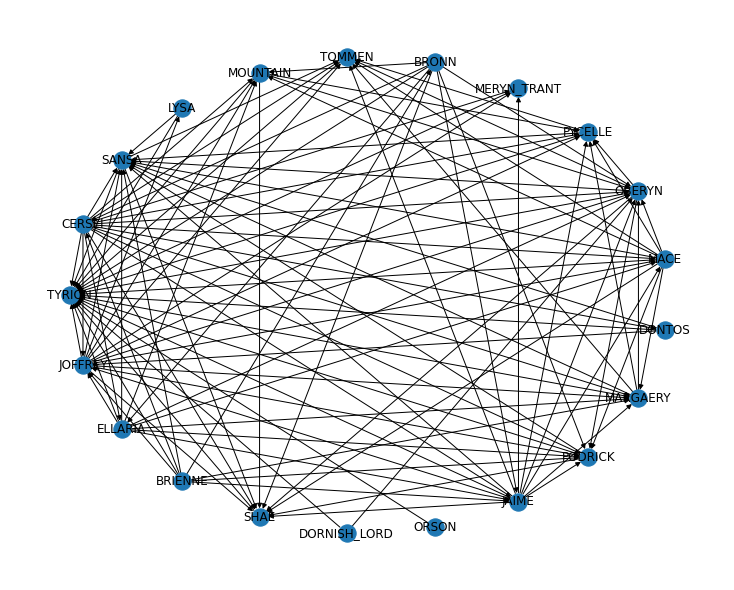

In [84]:
figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes=nodes_interest), with_labels=True)

In [85]:
len(G.nodes)

172

In [86]:
len(G.edges)

667

In [87]:
G.in_degree["SANSA"]

23

In [88]:
G.out_degree["SANSA"]

8

In [89]:
list(G.neighbors(n="SANSA"))

['TYRION',
 'SHAE',
 'YOHN_ROYCE',
 'TYWIN',
 'TOMMEN',
 'VANCE_CORBRAY',
 'VARYS',
 'WAYMAR_ROYCE']

In [90]:
list(G.predecessors(n="SANSA"))

['LITTLEFINGER',
 'LYSA',
 'ROBIN',
 'DONTOS',
 'JOFFREY',
 'ANYA_WAYNWOOD',
 'CERSEI',
 'JAIME',
 'NED',
 'BRIENNE',
 'CATELYN',
 'MARGAERY',
 'MACE',
 'OBERYN',
 'PODRICK',
 'ARYA',
 'JOFFREY_DWARF',
 'OLENNA',
 'PYCELLE',
 'ROBB',
 'ELLARIA',
 'LORAS',
 'ROBB_DWARF']

In [91]:
list(G.successors(n="SANSA"))

['TYRION',
 'SHAE',
 'YOHN_ROYCE',
 'TYWIN',
 'TOMMEN',
 'VANCE_CORBRAY',
 'VARYS',
 'WAYMAR_ROYCE']

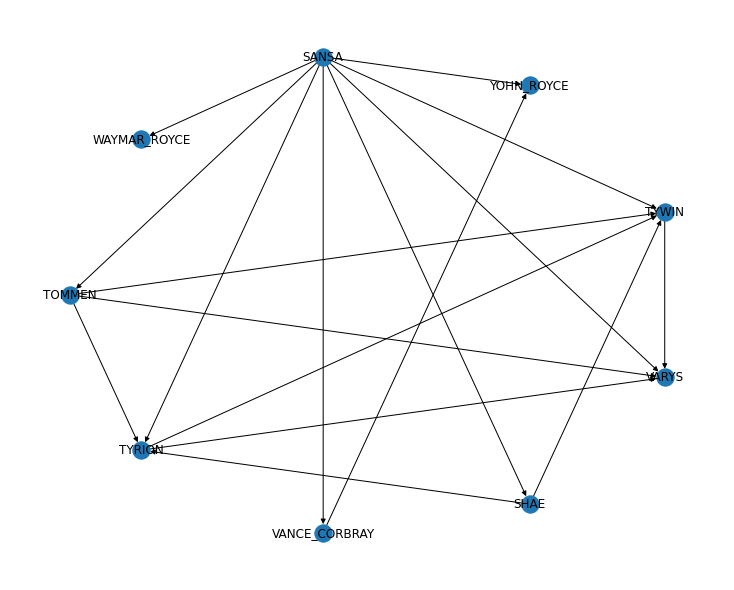

In [92]:
figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes=list(G.successors(n="SANSA")) + ["SANSA"]), with_labels=True)

In [93]:
#Edge List
edge_list = [i for i in G.edges()]
G_samp = nx.from_edgelist(edge_list, create_using=nx.DiGraph)

In [94]:
#adjacency matrix
A = nx.adjacency_matrix(G)

In [95]:
A.todense()

matrix([[0, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [96]:
list(nx.simple_paths.all_simple_paths(G, source="SANSA", target="TYRION"))

[['SANSA', 'TYRION'],
 ['SANSA', 'SHAE', 'TYRION'],
 ['SANSA', 'TOMMEN', 'TYRION']]

In [97]:
list(nx.shortest_path(G, source="SANSA", target="TYRION"))

['SANSA', 'TYRION']

In [99]:
nx.shortest_path_length(G, source="SANSA", target="TYRION") 

1

In [109]:
nodes_interest = list(s4_edges[s4_edges.Target == "TYRION"].Source) + ["TYRION"]

In [110]:
G_subgraph = G.subgraph(nodes=nodes_interest)

In [111]:
result = nx.degree_centrality(G_subgraph)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [112]:
sorted_d[0]

('TYRION', 1.0)

In [113]:
result = nx.betweenness_centrality(G_subgraph)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [114]:
sorted_d[0]

('JOFFREY', 0.05206443688586546)

In [115]:
result = nx.closeness_centrality(G_subgraph)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [116]:
sorted_d[0]

('TYRION', 1.0)

In [117]:
result = nx.pagerank(G_subgraph)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [118]:
sorted_d[0]

('TYRION', 0.27677906061209334)

In [119]:
! pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
!pip install cdlib[C]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
import os 

from google.colab import drive
import infomap
from cdlib import algorithms, evaluation, viz
#, viz
import networkx as nx
#, viz
#, viz
#, viz, evaluation
#import cdlib

In [122]:
coms_edge_betweenness = algorithms.girvan_newman(G_subgraph, level=4)

Community List: [['CATELYN', 'JOFFREY', 'TYRION', 'ELLARIA', 'LORAS', 'NED', 'BRIENNE', 'JOFFREY_DWARF', 'SHAE', 'MORGANS_FRIEND', 'ROBIN', 'BAELOR', 'JAIME', 'PODRICK', 'MARGAERY', 'DONTOS', 'MACE', 'OBERYN', 'PYCELLE', 'ROBB_DWARF', 'MAREI', 'MERYN_TRANT', 'BRONN', 'ROBB', 'TOMMEN', 'AERYS', 'MOUNTAIN', 'OLENNA', 'LYSA', 'SANSA', 'MORGAN', 'LITTLEFINGER', 'CERSEI'], ['LOLLYS'], ['DORAN'], ['DORNISH_LORD'], ['ORSON']]
Conductance: FitnessResult(min=0.0027100271002710027, max=1.0, score=0.8005420054200542, std=0.39891598915989157)
Expansion: FitnessResult(min=0.030303030303030304, max=2.0, score=1.206060606060606, std=0.7386484070502236)
Internal Density: FitnessResult(min=0, max=0.3484848484848485, score=0.0696969696969697, std=0.1393939393939394)


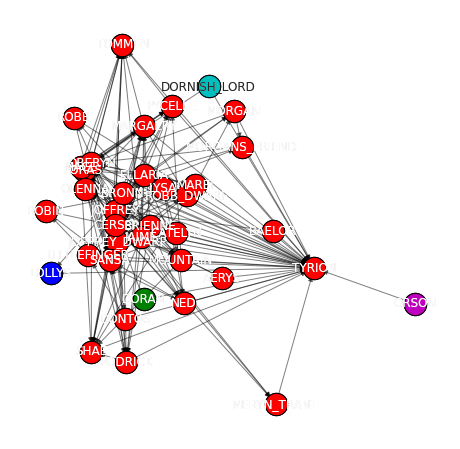

In [123]:
viz.plot_network_clusters(G_subgraph, coms_edge_betweenness, plot_labels=True, node_size=500)
print("Community List: " + str(coms_edge_betweenness.communities))
print("Conductance: " + str(coms_edge_betweenness.conductance()))
print("Expansion: " + str(coms_edge_betweenness.expansion()))
print("Internal Density: " + str(coms_edge_betweenness.internal_edge_density()))

In [129]:
coms_infomap = algorithms.infomap(G_subgraph)

Community List: [['CATELYN', 'JOFFREY', 'ELLARIA', 'LORAS', 'BRIENNE', 'NED', 'JOFFREY_DWARF', 'LOLLYS', 'ROBIN', 'BAELOR', 'JAIME', 'MARGAERY', 'DONTOS', 'MACE', 'ROBB_DWARF', 'MERYN_TRANT', 'BRONN', 'ROBB', 'AERYS', 'MOUNTAIN', 'OLENNA', 'LYSA', 'LITTLEFINGER', 'CERSEI'], ['TYRION', 'SHAE', 'DORAN', 'MORGANS_FRIEND', 'DORNISH_LORD', 'ORSON', 'PODRICK', 'OBERYN', 'PYCELLE', 'MAREI', 'TOMMEN', 'SANSA', 'MORGAN']]
Conductance: FitnessResult(min=0.0, max=0.3445378151260504, score=0.1722689075630252, std=0.1722689075630252)
Expansion: FitnessResult(min=0.0, max=3.4166666666666665, score=1.7083333333333333, std=1.7083333333333333)
Internal Density: FitnessResult(min=0.2826086956521739, max=0.3974358974358974, score=0.34002229654403565, std=0.05741360089186176)


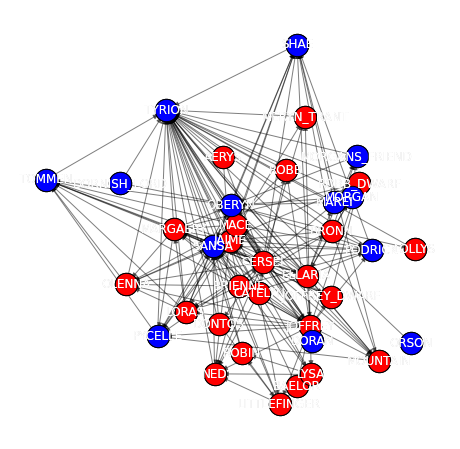

In [131]:
viz.plot_network_clusters(G_subgraph, coms_infomap,plot_labels=True, node_size=500)
print("Community List: " + str(coms_infomap.communities))
print("Conductance: " + str(coms_infomap.conductance()))
print("Expansion: " + str(coms_infomap.expansion()))
print("Internal Density: " + str(coms_infomap.internal_edge_density()))